In [1]:
import pandas as pd
import numpy as np
import pymysql

import plotly
import plotly.express as px
import plotly.graph_objects as go
import json

In [2]:
mysql_id = "ict1"
mysql_pwd = "ict1"
db_name = "ict1"
table_name = "prepv1_budget_20220830"

def get_df():
    df = None
    # load raw dataset
    try:
        conn = pymysql.connect(
            host='localhost',  # 호출변수 정의
            user=mysql_id,
            password=mysql_pwd,
            db="ict1",
            charset='utf8mb4'
        )
    except:
        print("ERROR : DB Connection")

    try:
        with conn.cursor() as cursor:
            query = "SELECT * FROM " + table_name
            cursor.execute(query)
            df = pd.DataFrame(cursor.fetchall(), columns=[i[0] for i in cursor.description])
    except:
        print("SQL ERROR")
    conn.close()
    return df

df = get_df()
df["budget"] = df["예산"].apply(lambda x: int(x.split()[0]))
df.head()

,번호,관리기관,사업명,예산,지원분야,공고명_명사추출,budget
0,1,고용노동부,고용안정장려금,185191 백만원,인력,고용 안정 장려,185191
1,2,고용노동부,고용유지지원금,598058 백만원,인력,고용 유지 원금,598058
2,3,고용노동부,고용창출장려금,686888 백만원,인력,고용 출장 려금,686888
3,4,고용노동부,고용장려금(융자),5455 백만원,인력,고용 장려 융자,5455
4,5,고용노동부,일터혁신지원,25720 백만원,경영,일터 혁신,25720


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:\\Users\\take\\PycharmProjects\\ICT_competition_mysql\\Data_Engineering\\utilities\\font\\nanum-square\\NanumSquareR.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [8]:
graph_df = df.groupby("지원분야")["budget"].sum().sort_values(ascending=False)

In [86]:
graph_df

지원분야
경영    15175739
금융    12098808
기술     6388701
인력     3941755
창업     1318847
내수      952088
수출      735287
Name: budget, dtype: int64

Text(6.8, 16200, '(단위 : 십억)')

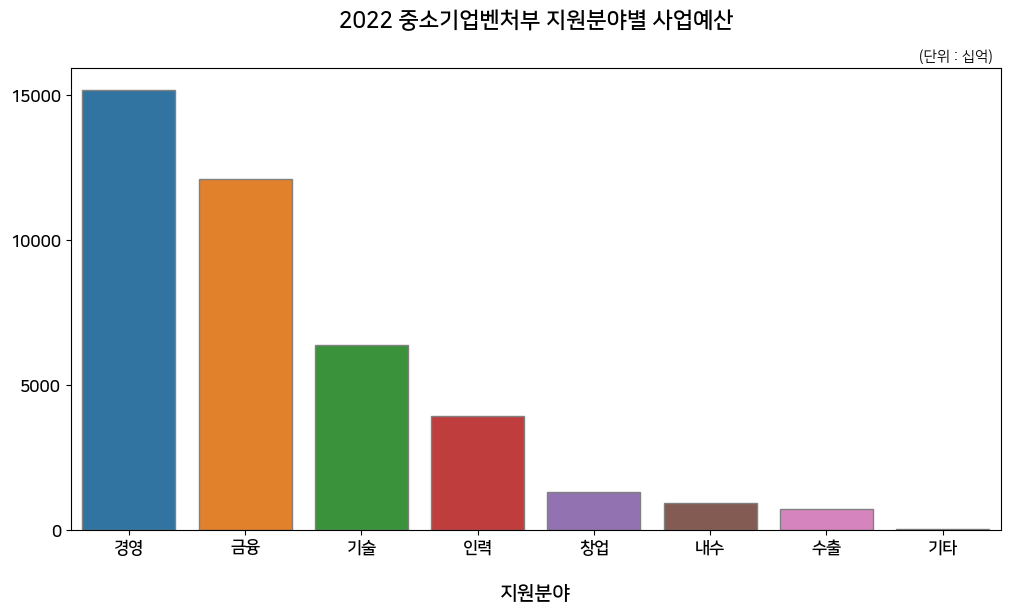

In [54]:
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(ax=ax, x=graph_df.index, y=graph_df.values / 1000, errorbar=None, edgecolor="grey")
ax.set_xlabel(xlabel=ax.get_xlabel(), labelpad=20, **{"fontsize":14, "fontweight":"bold"})
ax.set_ylabel(ylabel=ax.get_ylabel(), labelpad=20, **{"fontsize":14, "fontweight":"bold"})
ax.set_ylabel(ylabel="", labelpad=20, **{"fontsize":14, "fontweight":"bold"})

ax.set_xticklabels(labels=ax.get_xticklabels(), **{"fontsize":12, "fontweight":"bold"})
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=5000.0))
plt.yticks(**{"fontsize":12, "fontweight":"bold"})

plt.title('2022 중소기업벤처부 지원분야별 사업예산', fontdict={"fontsize":16, "fontweight":"bold"}, loc='center', pad=30)
plt.text(6.8, 16200, '(단위 : 십억)', fontsize=10.5)

In [55]:
import plotly.express as px

 
fig = px.pie(values=graph_df.values / 1000, names=graph_df.index,
             width=800, height=600, hover_name=graph_df.values,
             title='<b>2022 중소기업벤처부 지원분야별 사업예산 비율<b>',
             color_discrete_sequence=px.colors.sequential.Sunset)

fig.update_traces(textinfo='label+percent', textfont_size=17, hole=0.2,
                  marker=dict(line=dict(color='black', width=2)))

fig.update_layout(font_family="Open Sherif",
                  title_font_size=20, title_pad_l=220,
                  legend_font_family="Open Sherif", legend_font_size=16,
                  legend_title="<b>지원분야<b>", legend_title_font_size=18,
                  legend_title_side="top")
fig.show()